In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/"
filelist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv"):
        filelist.append(dir_path + file)
filelist

['/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/4.s&p_twitter_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/10.news_senti_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/8.CBDC_atten_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/8.CBDC_uncertainty_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/fear&greed_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_pos_sentiment_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_neg_sentiment_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/twitter_btccrash_pos_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/twitter_btccrash_neg_v2.csv']

In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Crypto Data/"
coinlist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv")and "binance" not in file and "uniswap" not in file and "chainlink" not in file:
        coinlist.append(dir_path + file)
coinlist

['/content/drive/MyDrive/S&P Crypto Project/Crypto Data/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_exlarge_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/ether_v2.csv']

In [ ]:
filelist[1][64:-7]

'10.news_senti'

In [ ]:
def cal_corr(file, coinlist):
  df_st = pd.read_csv(file)
  indexname = file[64:-7]
  df_st.columns = ['date',indexname]
  df_st[indexname+'_change'] = df_st[indexname].pct_change()

  for coin in coinlist:
    df_coin = pd.read_csv(coin)
    coinname = coin[54:-7]
    df_coin.columns = ['Date',coinname+'_price']
    df_coin[coinname+'_return'] = df_coin[coinname+'_price'].pct_change()

    df_st = df_st.merge(df_coin, left_on = 'date', right_on = 'Date', how = 'left')
    df_st.drop('Date',axis = 1,inplace = True)
    df_st[coinname+'_corr'] = df_st[indexname+'_change'].rolling(100).corr(df_st[coinname+'_return'])

    lagged_days = [1,3,5,7,9]
    for day in lagged_days:
      df_st[coinname+str(day)+'lag_corr'] = df_st[indexname+'_change'].rolling(100).corr(df_st[coinname+'_return'].shift(day))
    
  df_st.set_index('date',inplace=True)
  

  col_list = []
  for col in df_st.columns:
      if col.endswith("_corr"):
        col_list.append(col)
  df_small = df_st[col_list]
  df_valid = df_small[~df_small.isnull().all(1)]
  filename = file[64:-7]
  df_valid.to_csv("/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/"+filename+"_return_corr.csv")


In [ ]:
for file in filelist:
  cal_corr(file,coinlist)

In [ ]:
dir2 = "/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/"
filelist2 =[]
for file in os.listdir(dir2):
    if file.endswith("_corr.csv"):
        filelist2.append(dir2 + file)
filelist2

['/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/twitter_btccrash_pos_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/twitter_btccrash_neg_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/4.s&p_twitter_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/10.news_senti_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/8.CBDC_atten_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/8.CBDC_uncertainty_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/sentiment_correlation/return_corr_summary/fear&greed_return_corr.csv',
 '/content/drive/MyDrive/S

- Positive correlation between s&p 500 and coins return without lag most significant

<AxesSubplot:title={'center':'sp500 twitter'}, xlabel='date'>

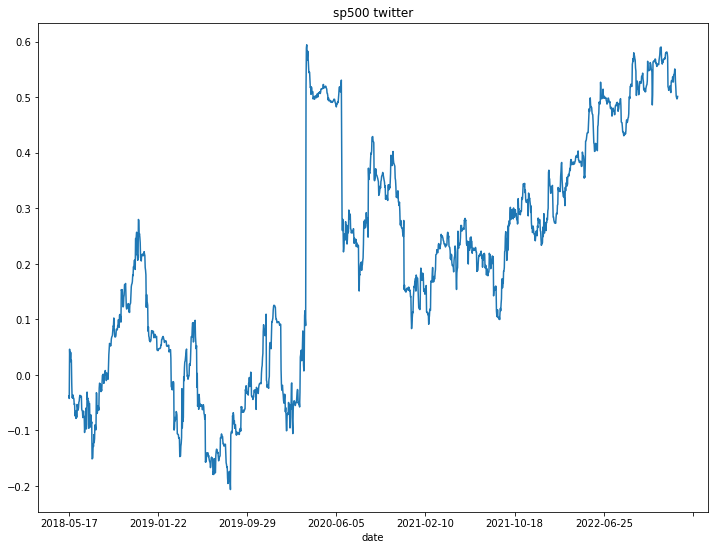

In [ ]:
import matplotlib.pyplot as plt
df_sp500_twitter = pd.read_csv(filelist2[2])
df_sp500_twitter.set_index('date',inplace = True)
df_sp500_twitter['bitcoin_corr'].plot(figsize = (12,9),title = 'sp500 twitter')

- news sentiment not significant in general, lagging improves a bit

<AxesSubplot:title={'center':'news sentiment'}, xlabel='date'>

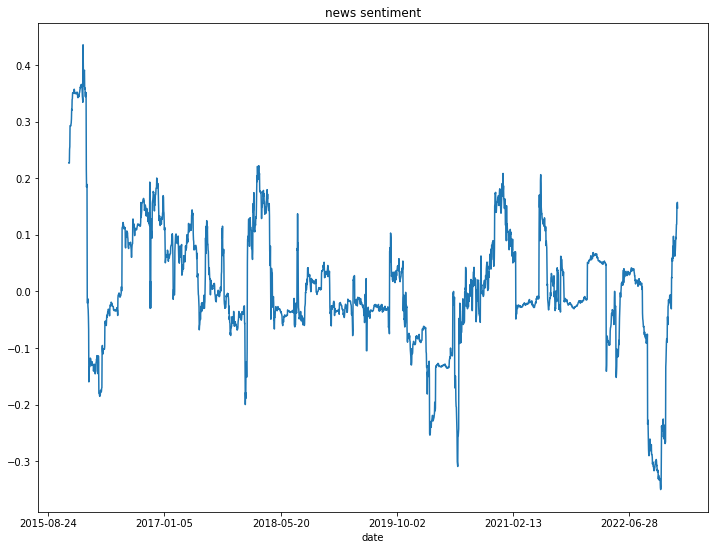

In [ ]:
df_newssenti = pd.read_csv(filelist2[3])
df_newssenti.set_index('date',inplace = True)
df_newssenti['ethereum5lag_corr'].plot(figsize = (12,9),title = 'news sentiment')

- cbdc attention not significant in general, lagging improves a bit

<AxesSubplot:title={'center':'cbdc attention'}, xlabel='date'>

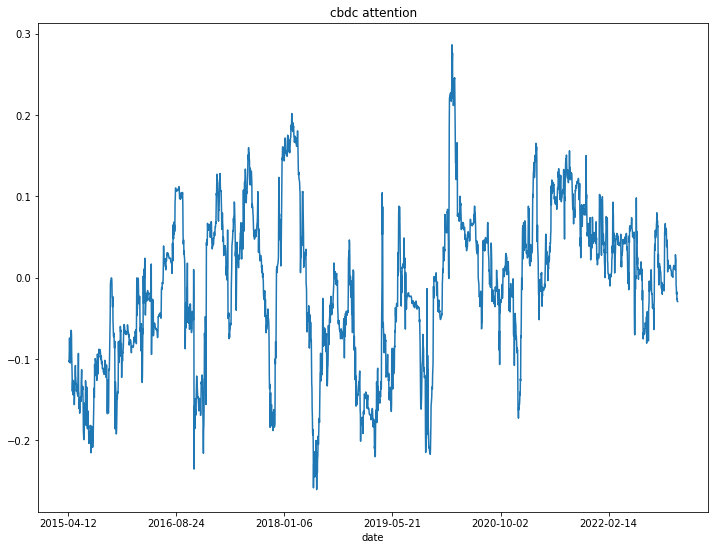

In [ ]:
df_cbdc_atten = pd.read_csv(filelist2[4])
df_cbdc_atten.set_index('date',inplace = True)
df_cbdc_atten['bitcoin5lag_corr'].plot(figsize = (12,9),title = 'cbdc attention')

- cbdc uncertainty not significant in general, 1 day lagging improves a bit

<AxesSubplot:title={'center':'cbdc uncertainty'}, xlabel='date'>

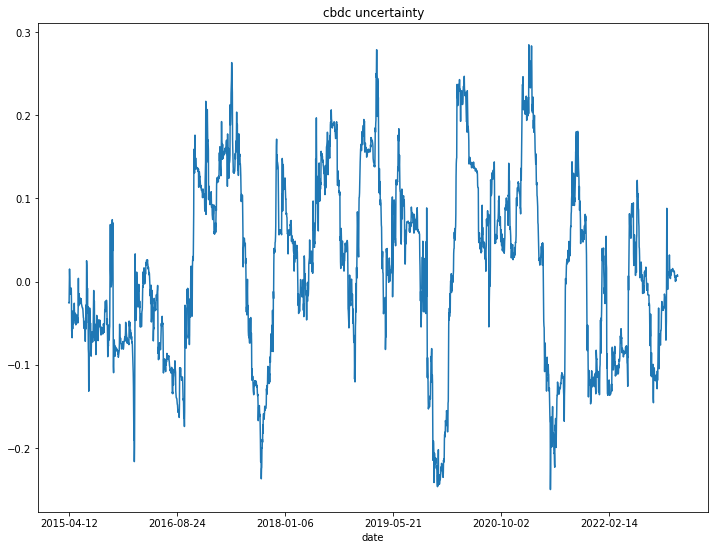

In [ ]:
df_cbdc_unc = pd.read_csv(filelist2[5])
df_cbdc_unc.set_index('date',inplace = True)
df_cbdc_unc['bitcoin1lag_corr'].plot(figsize = (12,9),title = 'cbdc uncertainty')

- fear and greed sgnificant negative correlation. Lagging worse

<AxesSubplot:title={'center':'fear and greed'}, xlabel='date'>

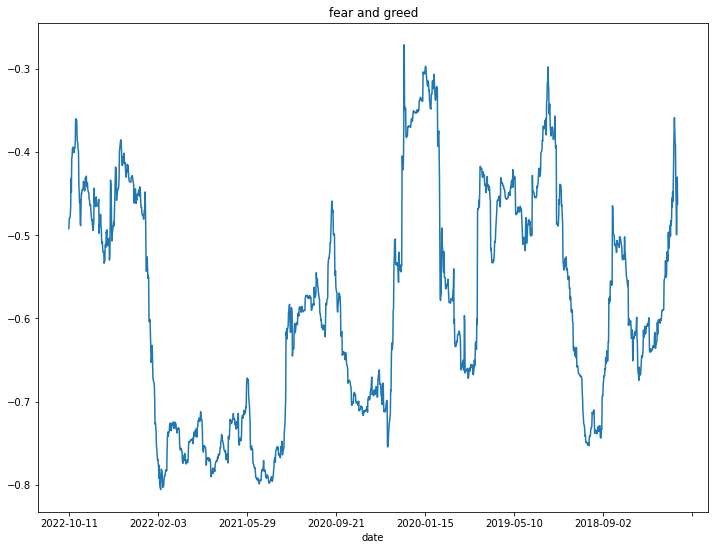

In [ ]:
df_fg = pd.read_csv(filelist2[6])
df_fg.set_index('date',inplace = True)
df_fg['bitcoin_corr'].plot(figsize = (12,9),title = 'fear and greed')

- twitter positive index insignificant.No lagging best

<AxesSubplot:title={'center':'twitter positive score'}, xlabel='date'>

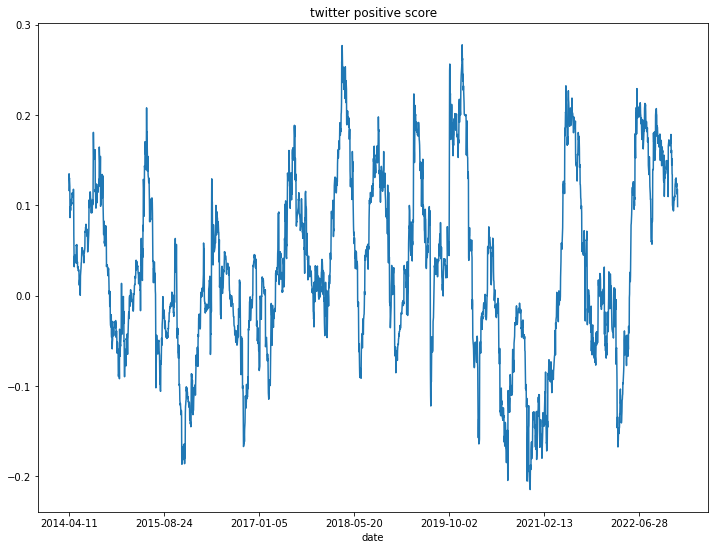

In [ ]:
df_tpos = pd.read_csv(filelist2[7])
df_tpos.set_index('date',inplace = True)
df_tpos['bitcoin_corr'].plot(figsize = (12,9),title = 'twitter positive score')

- twitter negative index shows some negative correlation. Lagging worse

<AxesSubplot:title={'center':'twitter negative score'}, xlabel='date'>

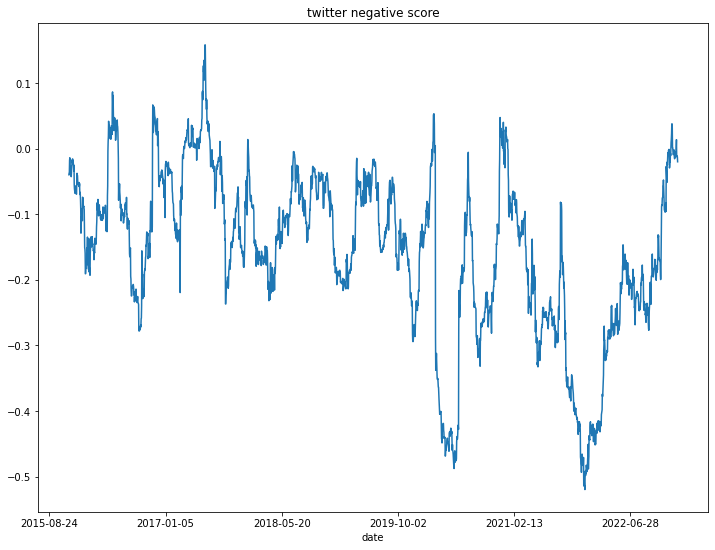

In [ ]:
df_tneg = pd.read_csv(filelist2[8])
df_tneg.set_index('date',inplace = True)
df_tneg['ethereum_corr'].plot(figsize = (12,9),title = 'twitter negative score')

<AxesSubplot:title={'center':'twitter bitcoin crash positive score'}, xlabel='date'>

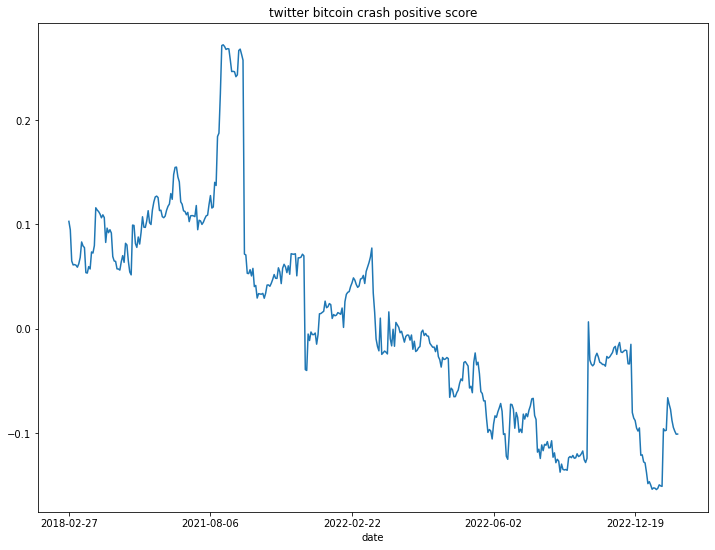

In [ ]:
df_tbcpos = pd.read_csv(filelist2[0])
df_tbcpos.set_index('date',inplace = True)
df_tbcpos['bitcoin1lag_corr'].plot(figsize = (12,9),title = 'twitter bitcoin crash positive score')

<AxesSubplot:title={'center':'twitter bitcoin crash negative score'}, xlabel='date'>

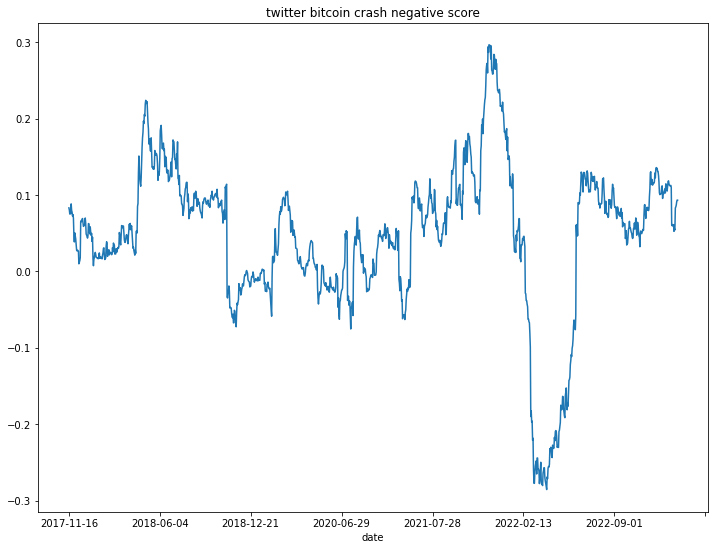

In [ ]:
df_tbcneg = pd.read_csv(filelist2[1])
df_tbcneg.set_index('date',inplace = True)
df_tbcneg['bitcoin1lag_corr'].plot(figsize = (12,9),title = 'twitter bitcoin crash negative score')

In [ ]:
# rolling weekly average for twitter index for plotting

In [ ]:
# impact of returns on the change in volatility (linear regression)

In [ ]:
# add control variable: rustle (2000 stock index), vix (market volatillty measure)
# for deep learning models, now they do not need to data be stationary. 